In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd

import keras
from keras.layers import Convolution2D, MaxPooling2D, Activation, Dense, Flatten, Reshape
from keras.models import Sequential
from keras.utils import np_utils

In [4]:
ds = pd.read_csv('../train.csv')
data = ds.values

X = data[:20000, 1:]
y = data[:20000, 0]

In [24]:
# Data preparation
X_ = X / 255.0

split = int(0.75 * X_.shape[0])
X_ = X_.reshape((X_.shape[0], 28, 28, 1))
X_train = X_[:split]
X_val = X_[split:]

y_ = np_utils.to_categorical(y)

y_train = y_[:split]
y_val = y_[split:]

print X_train.shape, X_val.shape
print y_train.shape, y_val.shape

(15000, 28, 28, 1) (5000, 28, 28, 1)
(15000, 10) (5000, 10)


In [20]:
# Model creation
model = Sequential()

model.add(Convolution2D(16, 5, 5, input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Convolution2D(8, 3, 3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_18 (Convolution2D) (None, 24, 24, 16)    416         convolution2d_input_11[0][0]     
____________________________________________________________________________________________________
maxpooling2d_13 (MaxPooling2D)   (None, 12, 12, 16)    0           convolution2d_18[0][0]           
____________________________________________________________________________________________________
activation_11 (Activation)       (None, 12, 12, 16)    0           maxpooling2d_13[0][0]            
____________________________________________________________________________________________________
convolution2d_19 (Convolution2D) (None, 10, 10, 8)     1160        activation_11[0][0]              
___________________________________________________________________________________________

In [25]:
# Model Training
hist = model.fit(X_train, y_train,
                nb_epoch=50,
                shuffle=True,
                batch_size=100,
                validation_data=(X_val, y_val))

Train on 15000 samples, validate on 5000 samples
Epoch 1/50
15000/15000 [==============================] - 4s - loss: 1.1076 - acc: 0.6514 - val_loss: 0.3395 - val_acc: 0.8976

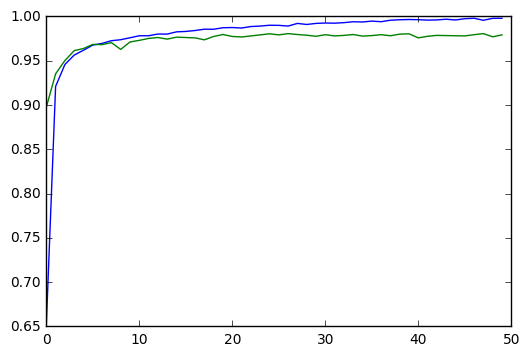

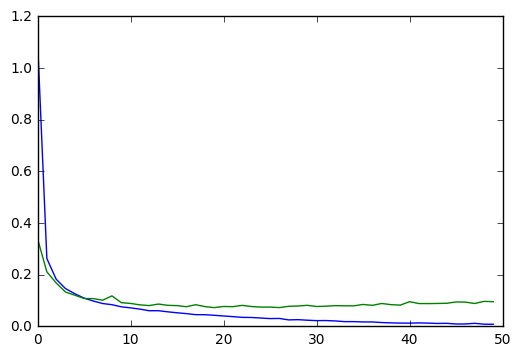

In [29]:
# Result analysis
plt.figure(0)
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])

plt.figure(1)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.show()

(5, 5, 1, 16)


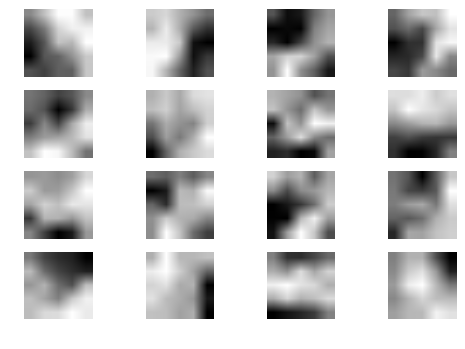

In [50]:
c = model.layers[0]
w = c.get_weights()
print w[0].shape

plt.figure(0)

for ix in range(w[0].shape[-1]):
    plt.subplot(4, 4, ix+1)
    plt.axis("off")
    plt.imshow(w[0][:, :, :, ix].reshape((5, 5)), cmap='gray')#, interpolation='none')

plt.show()

In [68]:
from keras.models import Model

In [69]:
# th.function([model.get_input_at(0), model.layers[0].output])